### Predicting Wine Quality with Several Classification Techniques

Description of Dataset

If you download the dataset, you can see that several features will be used to classify the quality of wine, many of them are chemical, so we need to have a basic understanding of such chemicals.

volatile acidity :   Volatile acidity is the gaseous acids present in wine.

fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic

residual sugar :   Amount of sugar left after fermentation.

citric acid :    It is weak organic acid, found in citrus fruits naturally.

chlorides :   Amount of salt present in wine.

free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
total sulfur dioxide 

pH :   In wine pH is used for checking acidity
density 

sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.

alcohol :   Percent of alcohol present in wine.


In [143]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import seaborn as sns
import plotly.express as px 

In [151]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [152]:
list(df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [154]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [155]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


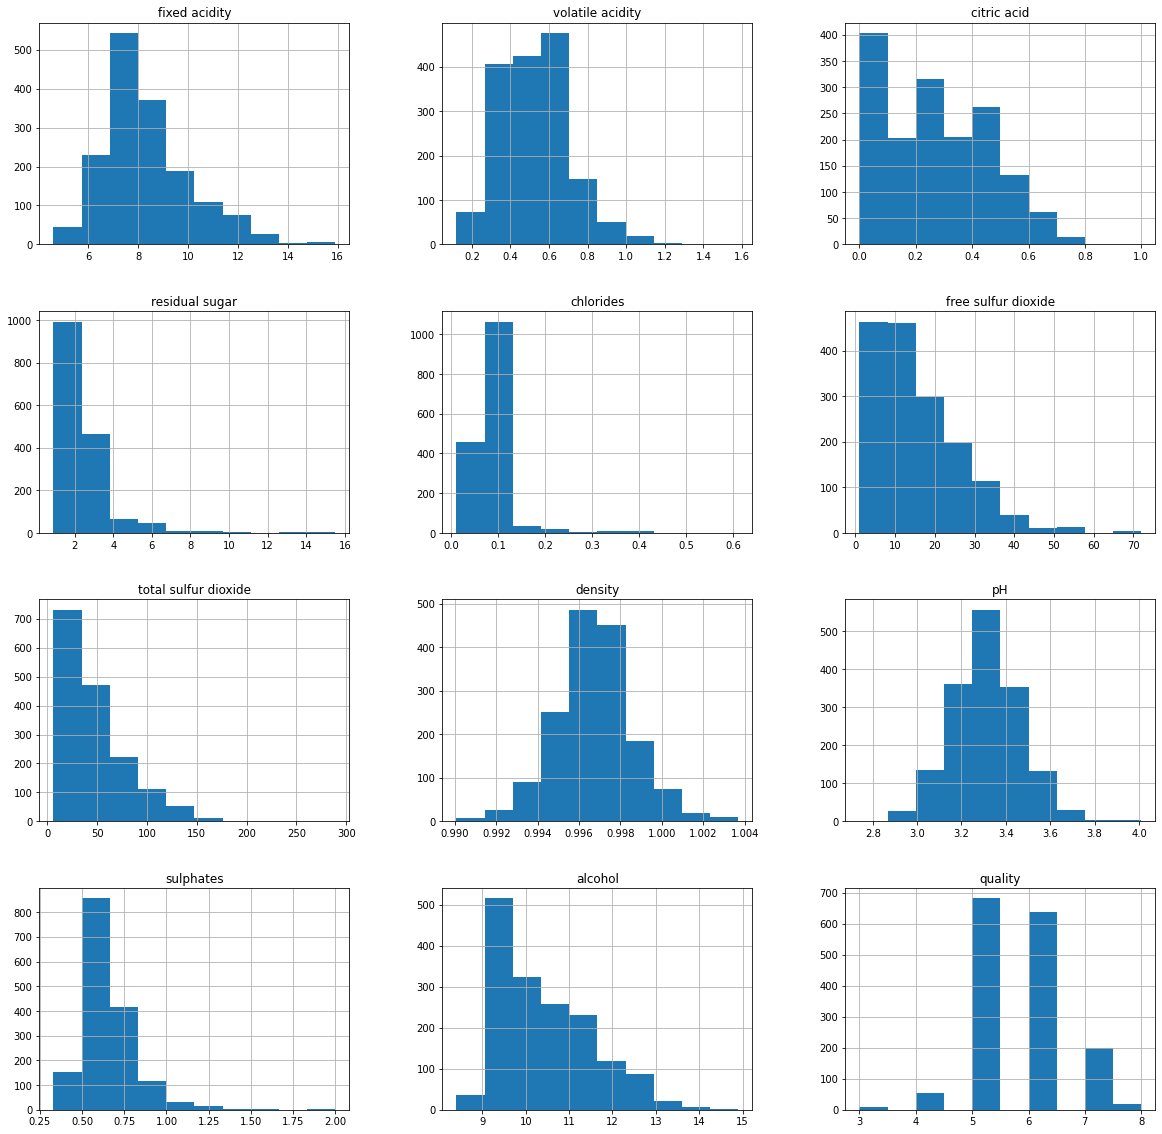

In [150]:
df.hist(figsize=(20,20));

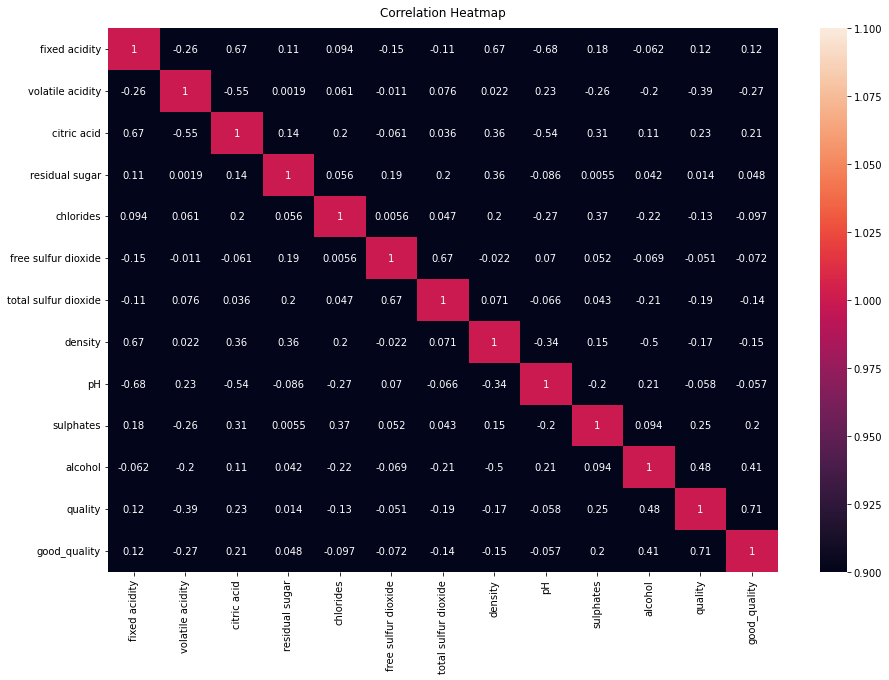

In [15]:
#The negative correlations mean that as the target variable 
#decreases in value, the feature variable increases in value. (Linearly)
# df.corr()
# plt.figure(figsize=(16,6))
plt.pyplot.subplots(figsize=(15,10))
heatmap = sns.heatmap(df.corr(), vmin=1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict= {'fontsize':12}, pad=12);

In [14]:
# corr_matrix = df.corr()
# print(corr_matrix["quality"].sort_values(ascending=False))

#### Convert to a Classification Problem : change the output variable to a binary output.

For this problem, I defined a bottle of wine as ‘good quality’ if it had a quality score of 7 or higher, and if it had a score of less than 7, it was deemed ‘bad quality’.


In [156]:
# Create Classification version of target variable
df['good_quality']= [1 if x >= 7 else 0 for x in df['quality']]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [157]:
# Proportion of Good vs Bad Wines
df['good_quality'].value_counts()

0    1382
1     217
Name: good_quality, dtype: int64

In [158]:
# # Separate feature variables and target variable
x = df.drop(['quality', 'good_quality'], axis=1)
y = df['good_quality']

In [159]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [91]:
from sklearn.model_selection import train_test_split

# Create a train: 0.8 | test: 0.2 ratio dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

# Create a train: 0.6 | validation: 0.2 ratio dataset
df_train, df_val = train_test_split(df, test_size=0.25, random_state=0)
# Final dataset sizes: train: 0.6, validation: 0.2, test: 0.2,

In [92]:
#  Output each shape to confirm the size of train/validation/test
print(f"Train: {df_train.shape}")
print(f"Validation: {df_val.shape}")
print(f"Test: {df_test.shape}")

Train: (1199, 13)
Validation: (400, 13)
Test: (320, 13)


In [93]:
#  Output all datasets to csv
df_train.to_csv('train.csv', index=False)
df_val.to_csv('validation.csv', index=False)
df_test.to_csv('test.csv', index=False)

### AutoGluon Model: 

AutoGluon can also automatically handle common issues like missing data and rescaling feature values.

Rather than just a single model, AutoGluon trains multiple models and ensembles them together to ensure superior predictive performance.

By default, AutoGluon tries to fit various types of models including neural networks and tree ensembles. Each type of model has various hyperparameters, which traditionally, the user would have to specify. AutoGluon automates this process.



In [ ]:
# For tabular problems, fit() returns a Predictor object. For classification, you can easily output
#predicted class probabilities instead of predicted classes:

# pred_probs = predictor.predict_proba(test_data_nolab)
# pred_probs.head(5)

#Besides inference, this object can also summarize what happened during fit:
# results = predictor.fit_summary(show_plot=True)


# We can view what properties AutoGluon automatically inferred about our prediction task:
# print("AutoGluon infers problem type is: ", predictor.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor.feature_metadata)

#We can evaluate the performance of each individual trained model on our (labeled) test data:
# predictor.leaderboard(test_data, silent=True)


# When we call predict(), AutoGluon automatically predicts with the model that displayed the..
#best performance on validation data (i.e. the weighted-ensemble). We can instead specify..
#which model to use for predictions like this:
# predictor.predict(test_data, model='LightGBM')

#Presets: check documentation for detailed infor.

# Maximizing predictive performance
#Note: You should not call fit() with entirely default arguments if you are benchmarking..
#AutoGluon-Tabular or hoping to maximize its accuracy! To get the best predictive accuracy with AutoGluon,
# you should generally use it like this:

# time_limit = 60  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
# metric = 'roc_auc'  # specify your evaluation metric here
# predictor = TabularPredictor(label, eval_metric=metric).fit(train_data, time_limit=time_limit, presets='best_quality')
# predictor.leaderboard(test_data, silent=True)


In [37]:
# predictor = TabularPredictor(label="class", problem_type="classification", 
#                             ).fit(train_data=df_train, time_limit=600, presets="best_quality",)

In [94]:
time_limit = 60
metric = 'roc_auc'
predictor = TabularPredictor(label="good_quality", eval_metric=metric
                            ).fit(df_train, time_limit = time_limit, presets = "best_quality",)

No path specified. Models will be saved in: "AutogluonModels/ag-20220602_035325/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20220602_035325/"
AutoGluon Version:  0.4.0
Python Version:     3.9.4
Operating System:   Darwin
Train Data Rows:    1199
Train Data Columns: 12
Label Column: good_quality
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2362.57 MB
	Train Data (Original)  Memory Usage: 0.12 MB (0

[1000]	valid_set's binary_logloss: 8.60386e-06
[1000]	valid_set's binary_logloss: 6.75578e-06
[1000]	valid_set's binary_logloss: 5.3764e-05
[1000]	valid_set's binary_logloss: 1.47366e-05
[1000]	valid_set's binary_logloss: 1.12096e-05
[1000]	valid_set's binary_logloss: 8.5372e-06
[1000]	valid_set's binary_logloss: 3.09021e-05
[1000]	valid_set's binary_logloss: 7.06112e-06


	1.0	 = Validation score   (roc_auc)
	9.32s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 29.21s of the 49.14s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	1.0	 = Validation score   (roc_auc)
	3.37s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 25.63s of the 45.56s of remaining time.
	1.0	 = Validation score   (roc_auc)
	1.19s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: RandomForestEntr_BAG_L1 ... Training model for up to 24.17s of the 44.1s of remaining time.
	1.0	 = Validation score   (roc_auc)
	1.01s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 22.78s of the 42.71s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stoppi

In [95]:
predictor = TabularPredictor(label="good_quality").fit(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20220602_035443/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220602_035443/"
AutoGluon Version:  0.4.0
Python Version:     3.9.4
Operating System:   Darwin
Train Data Rows:    1199
Train Data Columns: 12
Label Column: good_quality
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2411.19 MB
	Train Data (Original)  Memory Usage: 0.12 MB (0.0% of available memory)
	Inferring data type of each

In [96]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost   1.000000       0.003585  0.941394                0.003585           0.941394            1       True          7
1         LightGBMLarge   1.000000       0.005877  1.074338                0.005877           1.074338            1       True         13
2            LightGBMXT   1.000000       0.007086  0.493956                0.007086           0.493956            1       True          3
3              LightGBM   1.000000       0.007366  0.445091                0.007366           0.445091            1       True          4
4               XGBoost   1.000000       0.009003  0.209073                0.009003           0.209073            1       True         11
5       NeuralNetFastAI   1.000000       0.021726  1.672477                0.021726           1.672477        

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.8791666666666667,
  'KNeighborsDist': 0.8958333333333334,
  'LightGBMXT': 1.0,
  'LightGBM': 1.0,
  'RandomForestGini': 1.0,
  'RandomForestEntr': 1.0,
  'CatBoost': 1.0,
  'ExtraTreesGini': 1.0,
  'ExtraTreesEntr': 1.0,
  'NeuralNetFastAI': 1.0,
  'XGBoost': 1.0,
  'NeuralNetTorch': 1.0,
  'LightGBMLarge': 1.0,
  'WeightedEnsemble_L2': 1.0},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'AutogluonModels/ag-20220602_035443/model

<AxesSubplot:xlabel='model'>

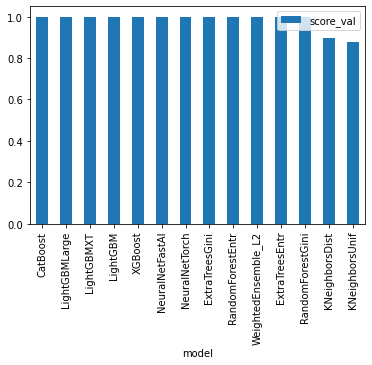

In [97]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [98]:
# test_acc = predictor.evaluate(df_test)
test_acc = predictor.predict(df_test)
test_acc

1109    0
1032    0
1002    1
487     0
979     0
       ..
794     0
813     0
1322    0
704     0
1023    0
Name: good_quality, Length: 320, dtype: int64

In [99]:
predictor.leaderboard(df_test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,1.000000,1.000000,0.005191,0.007366,0.445091,0.005191,0.007366,0.445091,1,True,4
1,XGBoost,1.000000,1.000000,0.006348,0.009003,0.209073,0.006348,0.009003,0.209073,1,True,11
2,CatBoost,1.000000,1.000000,0.007919,0.003585,0.941394,0.007919,0.003585,0.941394,1,True,7
3,LightGBMLarge,1.000000,1.000000,0.010246,0.005877,1.074338,0.010246,0.005877,1.074338,1,True,13
4,NeuralNetTorch,1.000000,1.000000,0.036814,0.035273,4.699779,0.036814,0.035273,4.699779,1,True,12
5,NeuralNetFastAI,1.000000,1.000000,0.044681,0.021726,1.672477,0.044681,0.021726,1.672477,1,True,10
6,RandomForestGini,1.000000,1.000000,0.109235,0.122469,1.251429,0.109235,0.122469,1.251429,1,True,5
7,ExtraTreesGini,1.000000,1.000000,0.136965,0.083652,1.176814,0.136965,0.083652,1.176814,1,True,8
8,WeightedEnsemble_L2,1.000000,1.000000,0.140884,0.087408,2.178508,0.003919,0.003756,1.001694,2,True,14
9,RandomForestEntr,1.000000,1.000000,0.147494,0.086735,0.948511,0.147494,0.086735,0.948511,1,True,6


### Preparing Data for Modelling

Standardizing Feature Variables

At this point, I felt that I was ready to prepare the data for modelling. The first thing that I did was standardize the data. Standardizing the data means that it will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1. It’s important to standardize your data in order to equalize the range of the data.

For example, imagine a dataset with two input features: height in millimeters and weight in pounds. Because the values of ‘height’ are much higher due to its measurement, a greater emphasis will automatically be placed on height than weight, creating a bias.

In [124]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
x_features = x
x = StandardScaler().fit_transform(x)

Split data

Next I split the data into a training and test set so that I could cross-validate my models and determine their effectiveness.

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### Modelling

#### Catboost Model Implementation

In [102]:
from catboost import CatBoostClassifier
model1 = CatBoostClassifier(iterations=2,
                          learning_rate=1,
                          depth=2)
model1.fit(x_train, y_train)

0:	learn: 0.3717465	total: 697us	remaining: 697us
1:	learn: 0.3092890	total: 2.06ms	remaining: 0us


In [110]:
#predict 
from sklearn.metrics import classification_report, accuracy_score
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))
accuracy_score(y_test, y_pred1)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       355
           1       0.48      0.33      0.39        45

    accuracy                           0.89       400
   macro avg       0.70      0.64      0.67       400
weighted avg       0.87      0.89      0.88       400



0.885

#### XGBoost Model

In [105]:
import xgboost as xgb
model2 = xgb.XGBClassifier(random_state=1)
model2.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
#predict
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))
accuracy_score(y_test, y_pred2)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       355
           1       0.62      0.69      0.65        45

    accuracy                           0.92       400
   macro avg       0.79      0.82      0.80       400
weighted avg       0.92      0.92      0.92       400



0.9175

#### LightGBM model

In [113]:
import lightgbm as lgb 
model3 = lgb.LGBMClassifier()
model3.fit(x_train, y_train)

LGBMClassifier()

In [115]:
#predict
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
accuracy_score(y_test, y_pred3)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       355
           1       0.72      0.73      0.73        45

    accuracy                           0.94       400
   macro avg       0.84      0.85      0.85       400
weighted avg       0.94      0.94      0.94       400



0.9375

#### AdaBoost 

In [116]:
from sklearn.ensemble import AdaBoostClassifier
model4 = AdaBoostClassifier(random_state=1)
model4.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [117]:
y_pred4 = model4.predict(x_test)
print(classification_report(y_test, y_pred4))
accuracy_score(y_test, y_pred4)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



0.89

#### Random Forest 

In [118]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(random_state=1)
model5.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [119]:
y_pred5 = model5.predict(x_test)
print(classification_report(y_test, y_pred5))
accuracy_score(y_test, y_pred5)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



0.9225

The model metrics showed that LightGBM (0.94) has the highest accuracy followed by xgboost(0.92) and randomforest (0.92)

### Feature importance 


#### via LightGBM model


<AxesSubplot:>

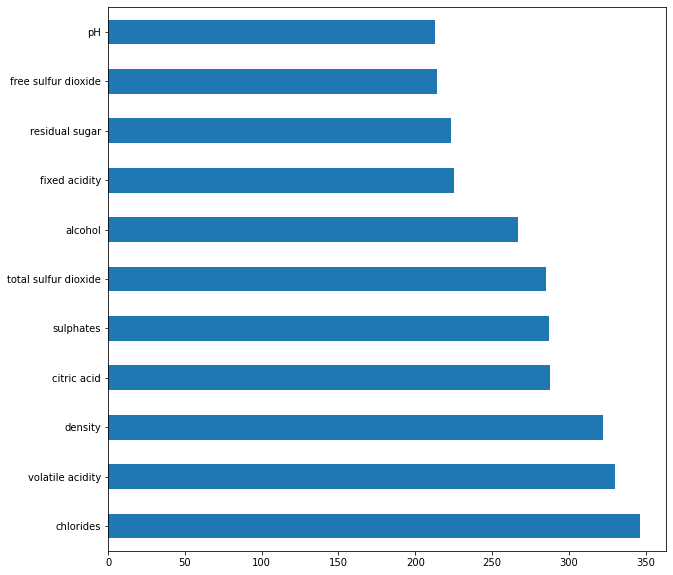

In [161]:
feat_importance = pd.Series (model3.feature_importances_, index =x.columns)
feat_importance.nlargest(25).plot(kind='barh',figsize=(10,10))

#### via random forest

<AxesSubplot:>

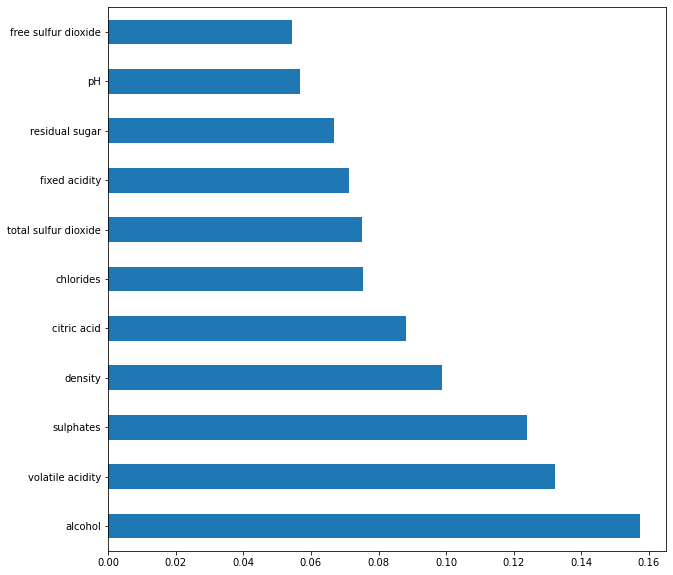

In [162]:
feat_importance = pd.Series (model5.feature_importances_, index =x.columns)
feat_importance.nlargest(25).plot(kind='barh',figsize=(10,10))

#### vis catboost

<AxesSubplot:>

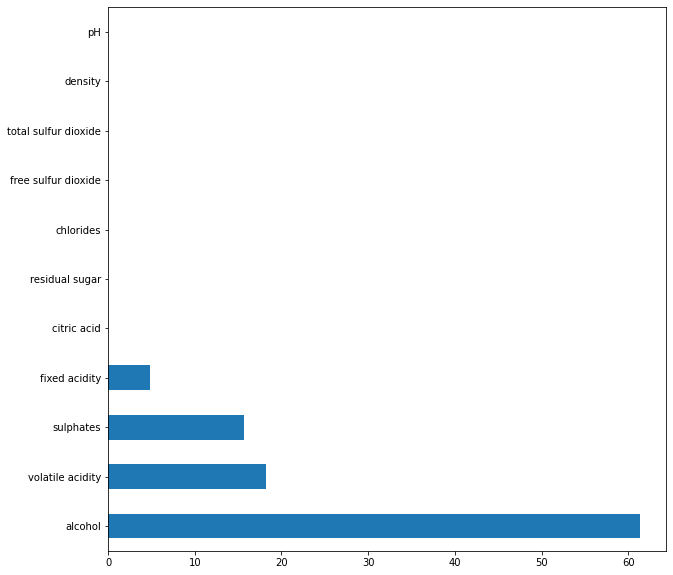

In [163]:
feat_importance = pd.Series (model1.feature_importances_, index =x.columns)
feat_importance.nlargest(25).plot(kind='barh',figsize=(10,10))

#### via adaboost


<AxesSubplot:>

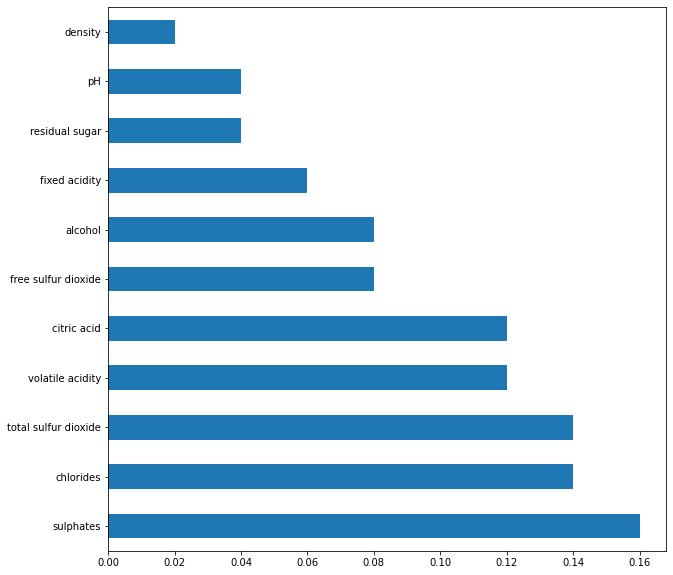

In [164]:
feat_importance = pd.Series (model4.feature_importances_, index =x.columns)
feat_importance.nlargest(25).plot(kind='barh',figsize=(10,10))

#### via xgboost 

<AxesSubplot:>

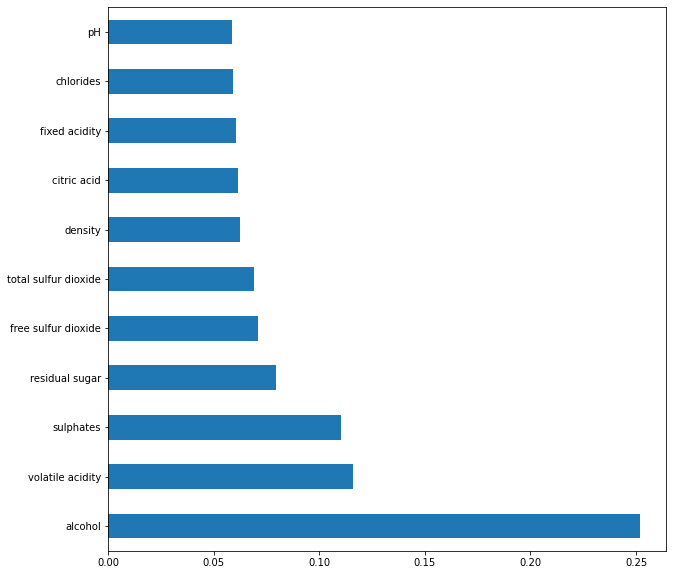

In [165]:
feat_importance = pd.Series (model2.feature_importances_, index =x.columns)
feat_importance.nlargest(25).plot(kind='barh',figsize=(10,10))

 from the graphs above, While they slightly vary, the top 3 important features are: alcohol, volatile acidity, and sulphates as shown in randomforest, catboost, and xgboost graphs

 for more insights, i will filter the dataset into good quality and bad quality to compare these varaibles in more detailes 

In [168]:
# Filtering df for only good quality
df_filter1 = df[df['good_quality']==1]
df_filter1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [169]:
# Filtering df for only bad quality
df_filter1 = df[df['good_quality']==0]
df_filter1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0


the description above shows that, good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

### Predicted and actual values 

In [176]:
#we can differentiate the predicted values and actual value:
x_predict = list(model3.predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
1109,0,0
1032,0,0
1002,1,1
487,0,0
979,0,0
1054,0,0
542,0,0
853,0,0
1189,0,0
412,0,0


### save the best model

In [175]:
import pickle 
file = "wine_quality"
save = pickle.dump(model3, open(file, "wb"))